In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.datasets import california_housing

from scipy import stats
import statsmodels.api as sm


In [461]:
df = pd.read_csv('kc_house_data.csv')

In [462]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [463]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [464]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [465]:
df['waterfront'] = df['waterfront'].fillna(0.0)

In [466]:
df['waterfront'].isna().sum()

0

In [467]:
#view tells us whether a property has been viewed or not. 
df.drop(columns='view', inplace=True)

In [468]:
#Check new column list
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [469]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [470]:
df['yr_renovated'].isna().sum()

3842

In [471]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [472]:
df['date'].min()

'1/10/2015'

In [473]:
df.loc[(df['yr_renovated']>=2000), 'renovate_15'] = 1
df.loc[(df['yr_renovated']<2000), 'renovate_15'] = 0

In [474]:
df['renovate_15'].unique()

array([0., 1.])

In [475]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [476]:
#outlier at bedroom = 33 should be removed as it is far higher than rest of set
df = df[df['bedrooms']!=33]

In [477]:
#check outlier removed
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [479]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2610.0        1
225.0         1
516.0         1
2390.0        1
266.0         1
784.0         1
2580.0        1
2190.0        1
792.0         1
861.0         1
2240.0        1
3000.0        1
374.0         1
2120.0        1
243.0         1
2570.0        1
1798.0        1
2490.0        1
295.0         1
506.0         1
2250.0        1
2350.0        1
274.0         1
1135.0        1
2500.0        1
2196.0        1
915.0         1
652.0         1
1548.0        1
1281.0        1
Name: sqft_basement, Len

In [480]:
#sqft basement needs to be converted to int64 and '?' removed
df['sqft_basement'].replace(to_replace = '?', value = '0.0', inplace=True)

In [481]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
          ...  
2610.0        1
225.0         1
516.0         1
2390.0        1
266.0         1
784.0         1
2580.0        1
2190.0        1
792.0         1
861.0         1
2240.0        1
3000.0        1
374.0         1
2120.0        1
243.0         1
2570.0        1
1798.0        1
2490.0        1
295.0         1
506.0         1
2250.0        1
2350.0        1
274.0         1
1135.0        1
2500.0        1
2196.0        1
915.0         1
652.0         1
1548.0        1
1281.0        1
Name: sqft_basement, Len

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [483]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


In [308]:
#option to make basement a binary option 1 = propert has basement, 0 = no basement

In the following two cells we set up our data split for furture train and test methods

In [309]:
#df, df_test, target, target_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [310]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,-0.023721,0.008169,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.008119
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.605392,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,0.106006
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,0.033965
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,0.063788
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,0.051032
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.013416
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,0.004070
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.071776,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,0.014794
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,-0.072809
grade,0.008169,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.756069,0.165863,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974,0.035661


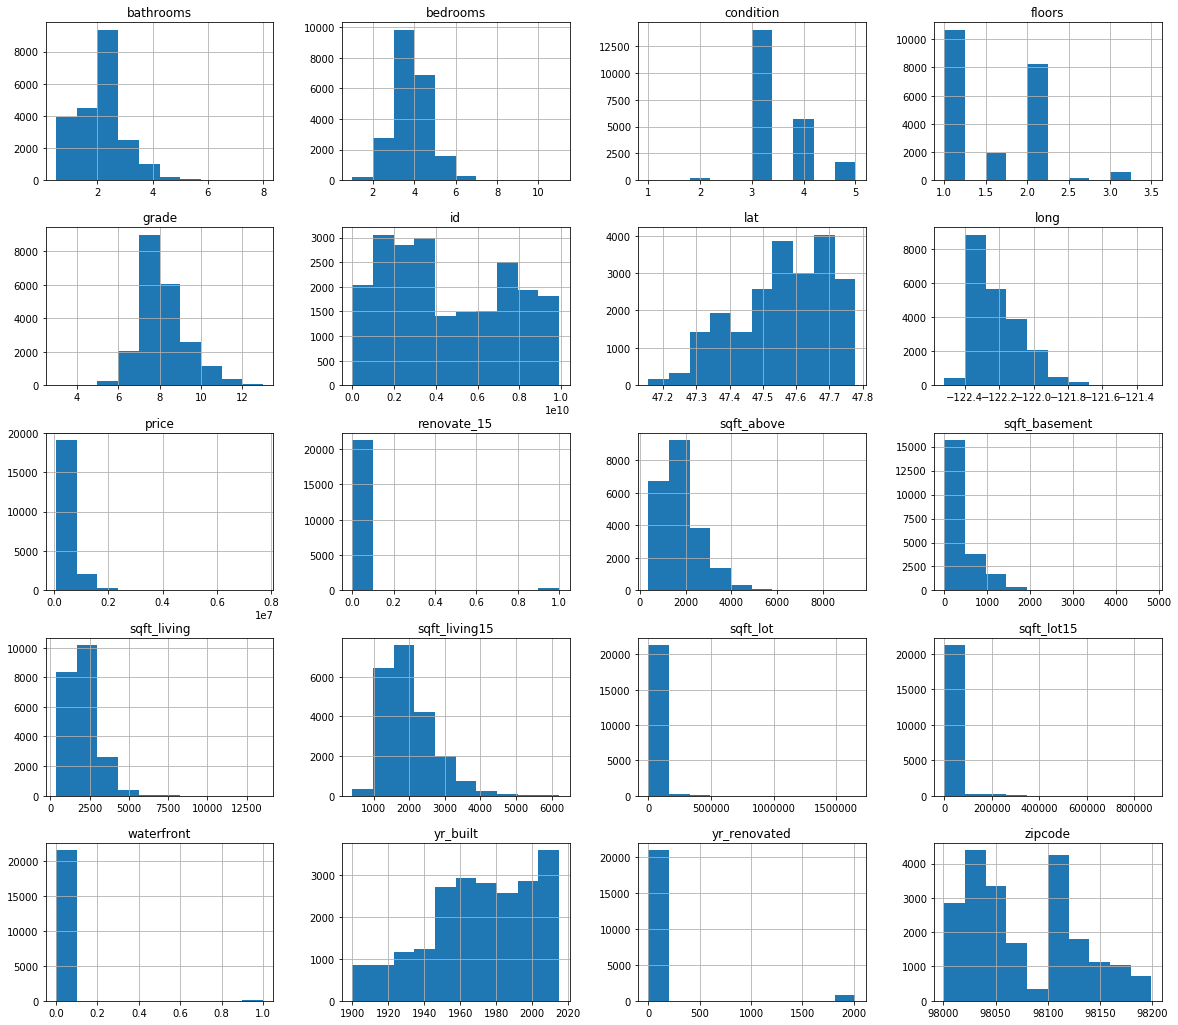

In [311]:
df.hist(figsize=(20,18));

In [312]:
import warnings
warnings.filterwarnings('ignore')

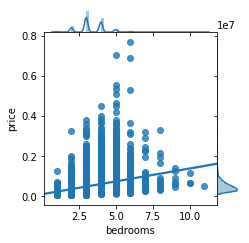

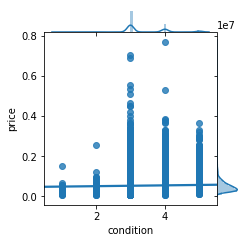

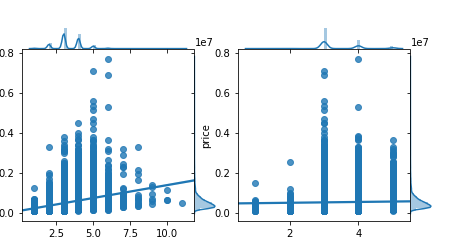

In [314]:
bedplt = sns.jointplot('bedrooms', 'price', data=df, kind='reg');
conplt = sns.jointplot('condition', 'price', data=df, kind='reg');

f = plt.figure()
for j in [bedplt, conplt]:
    for i in j.fig.axes:
        f._axstack.add(f._make_key(i), i)

f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

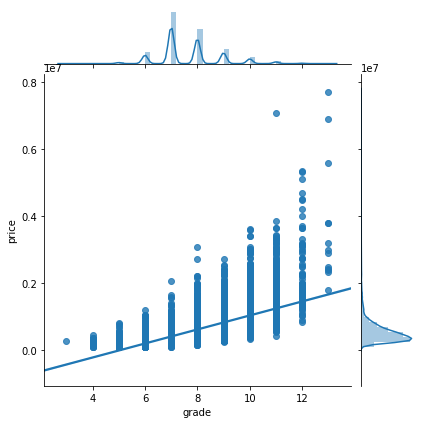

In [317]:
sns.jointplot('grade', 'price', data=df, kind='reg');

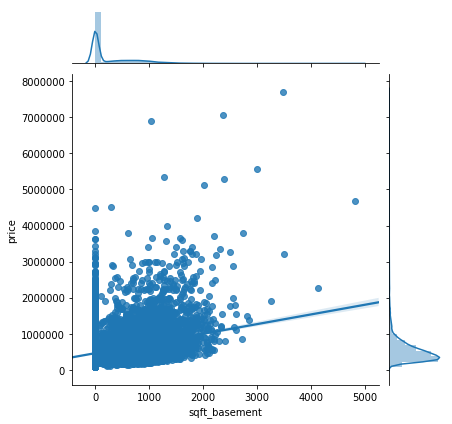

In [322]:
sns.jointplot('sqft_basement', 'price', data=df, kind='reg');

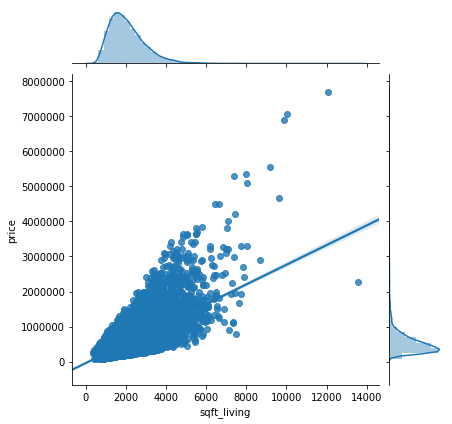

In [323]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg');

In [389]:
features = ['bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_basement', 
              'sqft_living', 'sqft_living15', 'sqft_lot15']
corr_df = df[feat].corr()

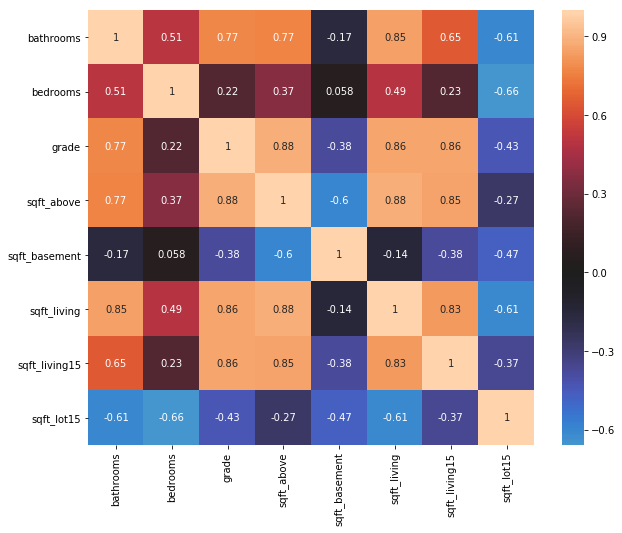

In [391]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_df.corr(), center=0, annot=True);

In [392]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [399]:
df1 = df[['price','bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_basement', 
              'sqft_living', 'sqft_living15', 'sqft_lot15']]
df1.head()

,price,bathrooms,bedrooms,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15
0,221900.0,1.00,3,7,1180,0.0,1180,1340,5650
1,538000.0,2.25,3,7,2170,400.0,2570,1690,7639
2,180000.0,1.00,2,6,770,0.0,770,2720,8062
3,604000.0,3.00,4,7,1050,910.0,1960,1360,5000
4,510000.0,2.00,3,8,1680,0.0,1680,1800,7503


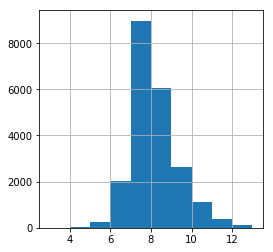

In [400]:
df1['grade'].hist(figsize=(4,4));

In [445]:
#Due to the heteroscadicity in the sqft_living against price regression we will focus on a smaller grade range
#but a range that includes the majority of houses in KC as illustrated in the plot above
data = df1.loc[(df1['grade'] >= 7) & (df1['grade'] <=10)]

In [446]:
#Prepare data for the train_test_split
target = data['price']
data, data_test, target, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [447]:
print(target.shape, target_test.shape)

(15029,) (3758,)


In [448]:
outcome = 'price'
for col in features:
    data[col]=(data[col]-data[col].mean())/data[col].std()
data.head()

,price,bathrooms,bedrooms,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15
16290,870000.0,0.827824,0.653139,2.460274,2.168664,-0.686035,1.640089,0.751718,0.116539
4185,1600000.0,0.827824,0.653139,1.350666,0.899506,2.081155,1.984468,1.883371,-0.295915
11643,550000.0,0.461395,-0.512798,-0.868549,-1.229403,-0.686035,-0.362409,-0.379936,-0.335152
4966,239000.0,-0.637892,-0.512798,-0.868549,-0.478826,-0.686035,-0.834336,-0.937793,-0.127905
14513,360000.0,-1.737179,-0.512798,-0.868549,-0.901878,-0.686035,-1.229734,-0.555263,1.523716


In [449]:
from statsmodels.formula.api import ols

In [450]:
predictors = '+'.join(data[['bathrooms', 'bedrooms', 'sqft_living']])
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     3267.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:31:03   Log-Likelihood:            -2.0710e+05
No. Observations:               15029   AIC:                         4.142e+05
Df Residuals:                   15025   BIC:                         4.142e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.418e+05   1905.379    284.371      0.000    5.38e+05    5.46e+05
bathrooms    5904.7403   2624.302      2.250      0.024     760.789     1.1e+04
bedrooms    -3.957e+04   2326.411    -17.011      0.000   -4.41e+04    -3.5e+04
sqft_living  2.041e+05   2821.140     72.357      0.000    1.99e+05     2.1e+05
==============================================================================
Omnibus:                     6770.916   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62402.273
Skew:                           1.937   Prob(JB):                         0.00
Kurtosis:                      12.200   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
z_target = stats.zscore(target)
model_standardised_all = sm.OLS(z_target, data[['bathrooms', 'bedrooms', 'sqft_living']])
results_standardised_all = model_standardised_all.fit()
results_standardised_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     3267.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:31:03   Log-Likelihood:                -17552.
No. Observations:               15029   AIC:                         3.511e+04
Df Residuals:                   15026   BIC:                         3.513e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms       0.0197      0.009      2.250      0.024       0.003       0.037
bedrooms       -0.1318      0.008    -17.012      0.000      -0.147      -0.117
sqft_living     0.6799      0.009     72.359      0.000       0.662       0.698
==============================================================================
Omnibus:                     6770.916   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62402.273
Skew:                           1.937   Prob(JB):                         0.00
Kurtosis:                      12.200   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

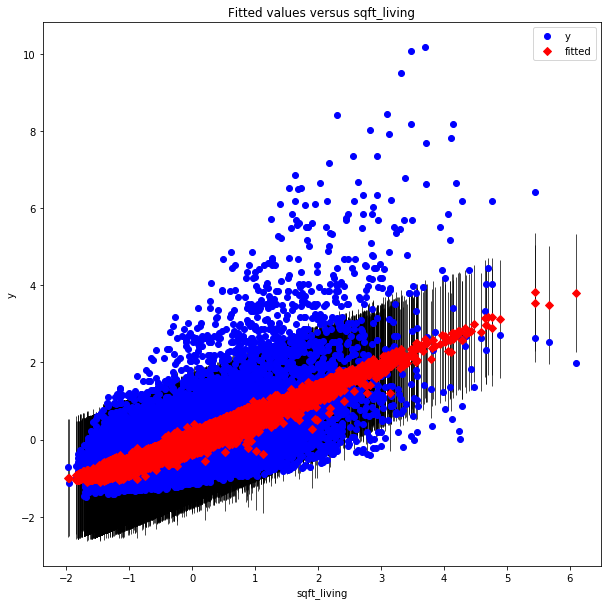

In [452]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.plot_fit(results_standardised_all, 'sqft_living', ax=ax)

In [ ]:
#So after reviewing various grade ranges, we can see that the grade is not affecting the h/s of sqft_living

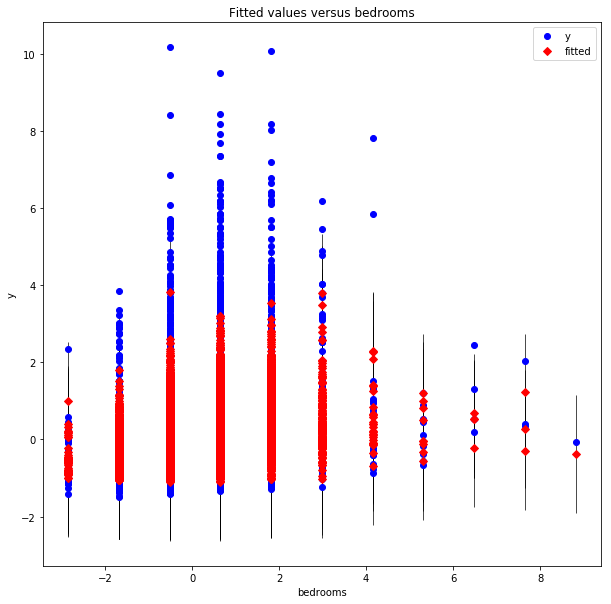

In [453]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.plot_fit(results_standardised_all, 'bedrooms', ax=ax)

In [454]:
#And neither does the change of grade significantly affect teh fit of the bedrooms predictor. 

In [ ]:
#My final test, going back to basics, will be that the size of your house and the area you live in will be a key 
#predictor of price